# Analyzing NASA Planetary Exploration Budgets in SQL


## By: Hrishikesh Dipak DesaiFor much of the last 60 years, NASA has been at the forefront of exploring our solar system. In this project, we'll see how much money they spent to do this. For expensive science projects, not least those funded with public money, the price of conducting research is a huge consideration, so budgeting is important.We'll use a cleaned up version of the [public dataset](https://www.planetary.org/space-policy/planetary-exploration-budget-dataset) provided by the The Planetary Society.

## What is the total cost of all planetary missions over all time?

A good first step in any budgetary analysis is to determine how much money has been spent in total.

For this, we need the `mission_budgets` table. Each row represents the cost in a fiscal year, of one aspect of a project for one mission. There are 5 columns:

- `mission`: The name of the mission.
- `fiscal_year`: The year, for accounting purposes.
- `cost_type`: Fine-grained aspect of the project, e.g., "Spacecraft".
- `cost_group`: Broader aspect of the project, e.g., "Development/Implementation".
- `cost_MUSD`: Cost in million US dollars.


### Instructions

- Calculate the total cost of all missions over all time as `total_cost_MUSD`.

In [2]:
-- Calculate the total cost of all missions over all time
SELECT SUM("cost_MUSD") AS total_cost_MUSD
FROM mission_budgets

,total_cost_musd
0,41406.554506


## What happens when you adjust for inflation?

Due to inflation, costs in the 1960s are not directly equivalent to those in the 2020s. We need to adjust for inflation in order to get a cost in current currency.

Correction factors are available in the `inflation` table. Each row represents an inflation adjustment for a time period relative to today. ther are two columns.

- `fiscal_year`: The year, for accounting purposes. Note that in 1976, inflation was especially high, so two values are provided. "1976" represents the start of the year, and "1976TQ" represents the third quarter onwards.
- `inflation_adjustment`: Multiply currency values from the past time by this number to get current currency values.

### Instructions

- Join the `mission_budgets` table to the `inflation` table on the fiscal year.
- Calculate the total cost of all missions over all time, adjusted for inflation as `adjusted_total_cost_MUSD`.

In [3]:
-- Calculate the total cost of all missions over all time, adjusted for inflation
SELECT SUM("cost_MUSD" * inflation_adjustment) AS adjusted_total_cost_MUSD
FROM mission_budgets
LEFT JOIN inflation
	USING(fiscal_year)
	--ON mission_budgets.fiscal_year = inflation.fiscal_year

,adjusted_total_cost_musd
0,80992.593983


## Which was the most expensive mission?

The biggest, grandest missions make headlines, but at some point, someone always asks questions about how much things cost, and the biggest budgets are the first place people look for cost savings. Knowing which is the most expensive project is an essential task for anyone responsible for a budget.

### Instructions

- Group the budgets by mission, and calculate the total cost for each mission.
- Get the mission with the highest total cost.

In [7]:
-- Get the mission with the highest total cost
SELECT mission, SUM("cost_MUSD" * inflation_adjustment) AS adjusted_total_cost_MUSD
FROM mission_budgets
LEFT JOIN inflation
	USING(fiscal_year)
GROUP BY mission
ORDER BY adjusted_total_cost_MUSD DESC
LIMIT 1

,mission,adjusted_total_cost_musd
0,Viking,7208.541041


## How much was spent each year?

Understanding how budgets change over time is also important. NASA has not been immune to the wax and wane of the US economy over the decades, nor the change in political enthusiasm for planetary exploration. More generally, to understand your current budget, it's usually helpful to know the context of how much budget you or your predecessors had in previous years.

### Instructions

- Group the budgets by mission, and calculate the inflation adjusted total cost for each mission.
- Save the results as the data frame `total_cost_by_year`.

In [9]:
-- Calculate the inflation adjusted total cost per year
SELECT fiscal_year, SUM("cost_MUSD" * inflation_adjustment) AS adjusted_total_cost_MUSD
FROM mission_budgets
LEFT JOIN inflation
	USING(fiscal_year)
GROUP BY fiscal_year
ORDER BY fiscal_year

,fiscal_year,adjusted_total_cost_musd
0,1960,261.139746
1,1961,674.849760
2,1962,1624.488450
3,1963,2268.368675
4,1964,2412.935820
...,...,...
72,2031,149.605633
73,2032,149.590728
74,2033,149.593212
75,2034,128.050000


### Instructions

- Draw a bar plot of total cost vs. year.
- Write down your interpretation of the plot.

In [10]:
import plotly.express as px

px.bar(
    total_cost_by_year, x = 'fiscal_year', target = 'adjusted_total_cost_musd'
)

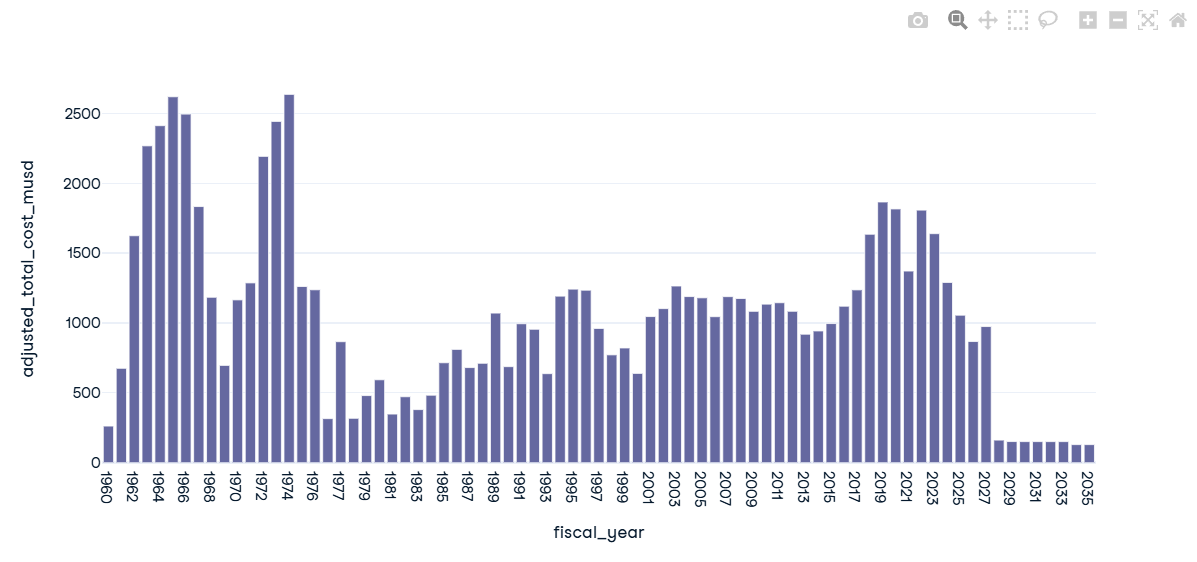

The bar plot of total cost vs. year shows the variation in NASA's budget over time, adjusted for inflation. From the plot, we can observe periods of increased spending, which may correspond to significant missions or projects, as well as periods of reduced spending, possibly due to economic downturns or shifts in political priorities. Notable peaks in the budget could indicate years when major missions were launched or significant investments were made in space exploration. Conversely, troughs might reflect budget cuts or reallocation of funds to other areas. Overall, the plot provides a visual representation of how NASA's financial resources have fluctuated over the years, offering insights into the economic and political factors influencing space exploration funding.

## How much was spent on each destination?

The 1960s was famous for the "Space Race" between the United States and Russia to be the first to get a man on the moon. In the time since then, attention has also been turned to the other planets in the solar system and to small bodies like asteroids and comets.

To analyze spending by destination, we'll need to look at the `mission_details` table. Each row represenats one mission. There are 4 columns:

- `mission`: The name of the mission.
- `mission_full_name`: The formal name of the mission.
- `destination`: The place in the solar system that the mission is exploring.
- `program`: The name of the NASA program that the mission is part of.

### Instructions

- Join the budgets to the mission details on the `mission` column.
- Calculate the total cost by destination.

In [11]:
-- Calculate the inflation adjusted total cost per destination
SELECT destination, SUM("cost_MUSD" * inflation_adjustment) AS adjusted_total_cost_MUSD
FROM mission_budgets
LEFT JOIN inflation
	USING(fiscal_year)
LEFT JOIN mission_details
	USING(mission)
GROUP BY destination
ORDER BY adjusted_total_cost_MUSD DESC

,destination,adjusted_total_cost_musd
0,Mars,31725.348594
1,Outer Planets,21827.564786
2,The Moon,12982.887263
3,Small Bodies,7365.860162
4,Venus,4796.703011
5,Mercury,1519.605957
6,Earth-Sun L1,427.220100
7,The Sun,347.404110


## How did spending by destination change over time?

You've already looked at spending by year and spending by destination individually. You can get more insight by looking at both of these things together.

### Instructions

- Join the budgets, inflation adjustment and details tables as before.
- Group the budgets by fiscal year and destination.
- Calculate the total adjusted cost for each group.
- Store the data frame as `total_cost_by_year_and_destination`.

In [13]:
-- Calculate the inflation adjusted total cost per year per destination
SELECT fiscal_year, destination, SUM("cost_MUSD" * inflation_adjustment) AS adjusted_total_cost_MUSD
FROM mission_budgets
LEFT JOIN inflation
	USING(fiscal_year)
LEFT JOIN mission_details
	USING(mission)
GROUP BY fiscal_year, destination
ORDER BY fiscal_year, destination

,fiscal_year,destination,adjusted_total_cost_musd
0,1960,The Moon,261.139746
1,1961,The Moon,674.849760
2,1962,The Moon,1248.174750
3,1962,Venus,376.313700
4,1963,Mars,382.522200
...,...,...,...
277,2032,Small Bodies,21.540728
278,2033,Outer Planets,128.050000
279,2033,Small Bodies,21.543212
280,2034,Outer Planets,128.050000


### Instructions


- Draw a bar plot of total cost vs. year, colored by destination.
- Write down your interpretation of the plot.

In [14]:
# Draw a bar plot of total cost vs. year, colored by destination
px.bar(
    total_cost_by_date_and_destination, x = 'fiscal_year', target = 'adjusted_total_cost_musd', color = 'destination'
)

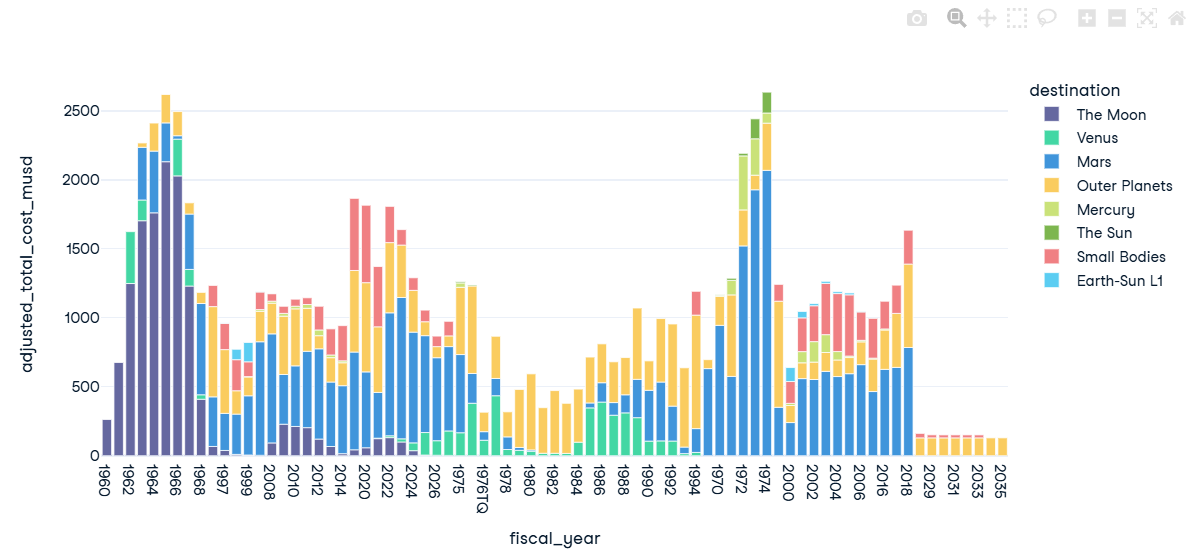

The bar plot shows the total adjusted cost of missions per fiscal year, with different colors representing different destinations. From the plot, we can observe the following:

1. **Trends Over Time**: There are noticeable trends in spending over the years. Some years have significantly higher total costs, which could be due to major missions or multiple missions being launched in those years.

2. **Destination-Specific Spending**: The color coding allows us to see which destinations received more funding in specific years. For example, certain years might show a higher concentration of spending on Mars missions, while others might show more spending on lunar missions.

3. **Budget Allocation**: The plot helps in understanding how the budget is allocated across different destinations over time. This can provide insights into the strategic priorities of the space program.

4. **Inflation Adjustment Impact**: Since the costs are adjusted for inflation, the plot provides a more accurate representation of the spending power and how it has changed over the years.

Overall, the plot is a useful tool for visualizing and analyzing the distribution of mission costs over time and across different destinations.

## Which part of the mission is most expensive, on average? (Does it make a difference if you look at `cost_type` or `cost_group`?)

In [15]:
-- Calculate the average cost by cost_type
SELECT 
    cost_type, 
    AVG("cost_MUSD") AS average_cost
FROM 
    mission_budgets
GROUP BY 
    cost_type
ORDER BY 
    average_cost DESC;

,cost_type,average_cost
0,Implementation (incl LV),185.750794
1,Development (incl LV),104.878261
2,Formulation,102.181013
3,Implementation,67.260000
4,Development,44.443590
5,Spacecraft,35.866449
6,Operations,25.874228
7,Launch Support,22.267568
8,Science,16.662385
9,Upper Stage,15.540000


In [16]:
-- Calculate the average cost by cost_group
SELECT 
    cost_group, 
    AVG("cost_MUSD") AS average_cost
FROM 
    mission_budgets
GROUP BY 
    cost_group
ORDER BY 
    average_cost DESC;

,cost_group,average_cost
0,Development/Implementation (incl LV),164.122093
1,Formulation,102.181013
2,Development/Implementation,37.688849
3,Operations & Data Analysis,21.467761
4,Launch Vehicle(s) & Support,16.075658
5,Science & Experiments,14.395138
6,Project Management/Ground Operations,5.969435


## For most programs, all the mission have the same destination, but that isn't always true. Which programs have more than one destination for their missions?

In [19]:
SELECT program, COUNT(destination)
FROM mission_details
GROUP BY program
HAVING COUNT(DISTINCT destination) > 1
ORDER BY count DESC

,program,count
0,Discovery,14
1,Mariner,6
2,,5
3,Pioneer,4
4,New Frontiers,3
5,SIMPLEx,3
6,Solar System Exploration,2
